In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   -------------------

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('student_habits_performance.csv')

# Visualizacao das primeiras linhas
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [5]:
# Tamanho do dataset
print("Tamanho:", df.shape)

# Tipos de dados
df.dtypes

# Resumo estatístico
df.describe()

Tamanho: (1000, 16)


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
print(df.isnull().sum())

# Remover duplicatas 
df.drop_duplicates(inplace=True)

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [8]:
#Tratamento de outliers 
for col in df.select_dtypes(include=[np.number]).columns: 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] > (q1 - 1.5*iqr)) & (df[col] < (q3 +1.5*iqr))]

In [10]:
#Transformação de variáveis categóricas 
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
#Normalização 
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [7]:
df.to_csv('processed_studednt_habits.csv') 

In [ ]:
#Início da análise exploratória 

In [18]:
# Estatísticas básicas
print(df.describe())

         student_id           age        gender  study_hours_per_day  \
count  9.770000e+02  9.770000e+02  9.770000e+02         9.770000e+02   
mean  -5.818160e-17  6.618156e-16  2.909080e-17         4.727255e-17   
std    1.000512e+00  1.000512e+00  1.000512e+00         1.000512e+00   
min   -1.730279e+00 -1.517144e+00 -9.800139e-01        -2.458280e+00   
25%   -8.651394e-01 -6.505847e-01 -9.800139e-01        -7.153125e-01   
50%    0.000000e+00 -2.173050e-01  7.608471e-01        -1.812544e-02   
75%    8.651394e-01  1.082534e+00  7.608471e-01         6.790616e-01   
max    1.730279e+00  1.515814e+00  2.501708e+00         2.631185e+00   

       social_media_hours  netflix_hours  part_time_job  \
count        9.770000e+02   9.770000e+02   9.770000e+02   
mean        -4.363620e-17   1.672721e-16  -1.199995e-16   
std          1.000512e+00   1.000512e+00   1.000512e+00   
min         -2.159082e+00  -1.705085e+00  -5.216660e-01   
25%         -6.806159e-01  -7.588918e-01  -5.216660e-01 

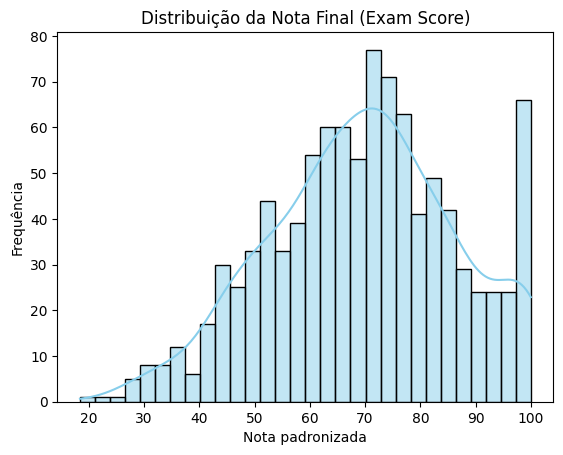

In [8]:
sns.histplot(df["exam_score"], kde=True, bins=30, color="skyblue")
plt.title("Distribuição da Nota Final (Exam Score)")
plt.xlabel("Nota padronizada")
plt.ylabel("Frequência")
plt.show()

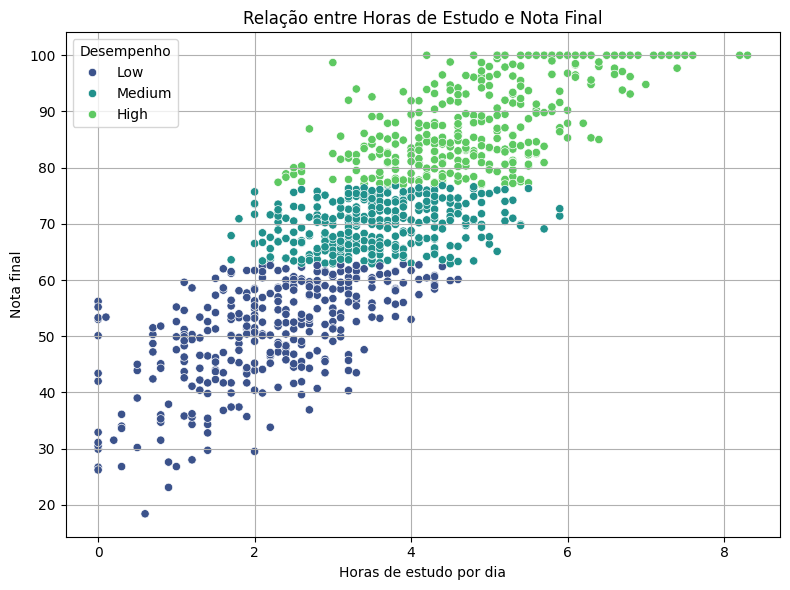

In [9]:
df["target"] = pd.qcut(df["exam_score"], q=3, labels=["Low", "Medium", "High"])

# Gráfico de dispersão: Horas de Estudo x Nota Final
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="study_hours_per_day", y="exam_score", hue="target", palette="viridis")
plt.title("Relação entre Horas de Estudo e Nota Final")
plt.xlabel("Horas de estudo por dia")
plt.ylabel("Nota final")
plt.legend(title="Desempenho")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13628\2077578810.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="gender", y="study_hours_per_day", palette="Set2")


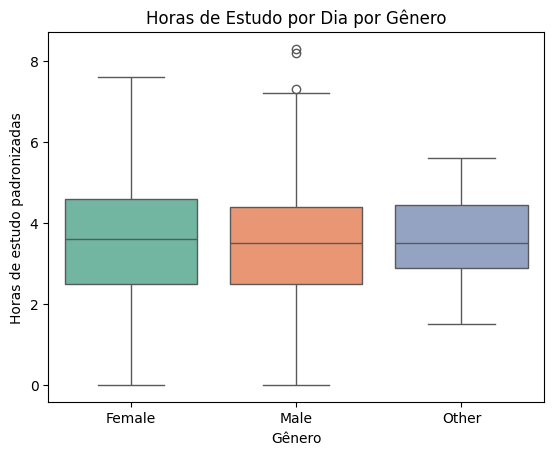

In [10]:
sns.boxplot(data=df, x="gender", y="study_hours_per_day", palette="Set2")
plt.title("Horas de Estudo por Dia por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Horas de estudo padronizadas")
plt.show()

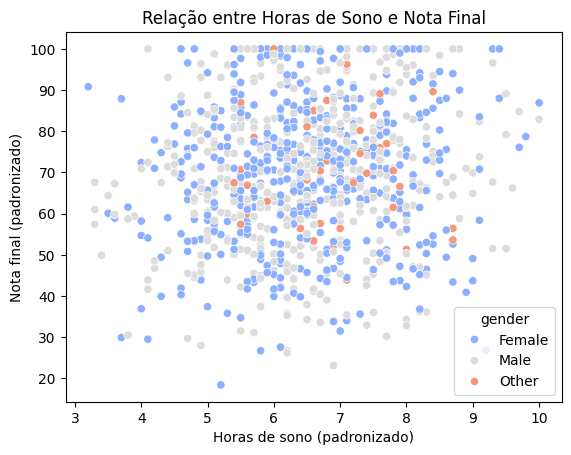

In [11]:
sns.scatterplot(data=df, x="sleep_hours", y="exam_score", hue="gender", palette="coolwarm")
plt.title("Relação entre Horas de Sono e Nota Final")
plt.xlabel("Horas de sono (padronizado)")
plt.ylabel("Nota final (padronizado)")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13628\3688843833.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="extracurricular_participation", palette="pastel")


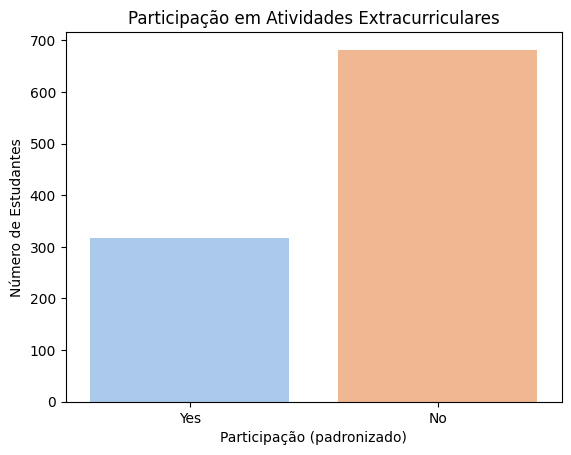

In [12]:
sns.countplot(data=df, x="extracurricular_participation", palette="pastel")
plt.title("Participação em Atividades Extracurriculares")
plt.xlabel("Participação (padronizado)")
plt.ylabel("Número de Estudantes")
plt.show()

C:\Users\rafae\AppData\Local\Temp\ipykernel_13628\2401735059.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="faixa_estudo", y="exam_score", data=df, palette="Blues")


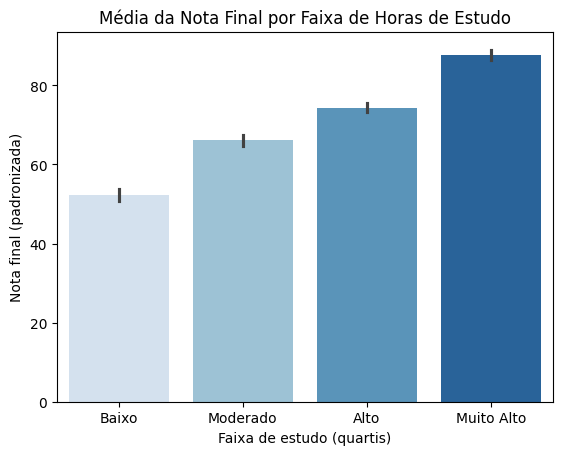

In [20]:
# Criar faixa artificial (após padronização)
df["faixa_estudo"] = pd.qcut(df["study_hours_per_day"], q=4, labels=["Baixo", "Moderado", "Alto", "Muito Alto"])

sns.barplot(x="faixa_estudo", y="exam_score", data=df, palette="Blues")
plt.title("Média da Nota Final por Faixa de Horas de Estudo")
plt.xlabel("Faixa de estudo (quartis)")
plt.ylabel("Nota final (padronizada)")
plt.show()


In [25]:
df[comportamento].dtypes

study_hours_per_day      float64
social_media_hours       float64
netflix_hours            float64
attendance_percentage    float64
sleep_hours              float64
diet_quality              object
exercise_frequency         int64
mental_health_rating       int64
exam_score               float64
dtype: object

In [6]:
df["diet_quality"] = df["diet_quality"].map({
    "Poor": 0,
    "Fair": 1,
    "Good": 2,
    "Excellent": 3
})

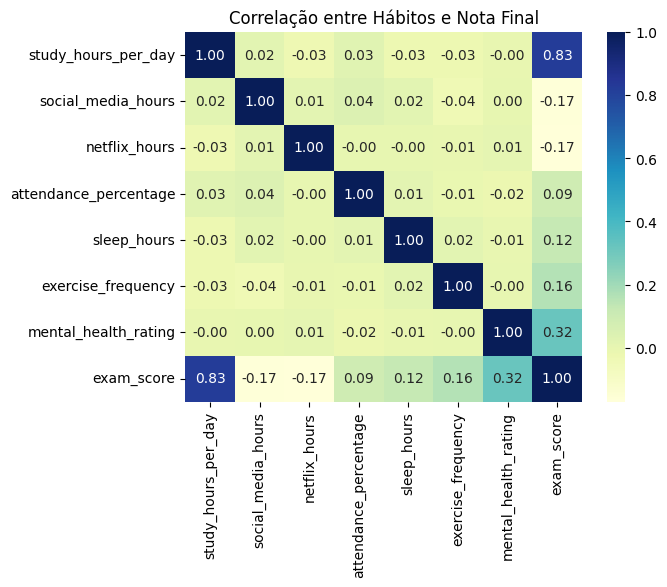

In [7]:
comportamento = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "attendance_percentage",
    "sleep_hours",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score"
]

sns.heatmap(df[comportamento].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlação entre Hábitos e Nota Final")
plt.show()

In [8]:
# Criar target com base na nota (ex: classificação em tercis)
df["target"] = pd.qcut(df["exam_score"], q=3, labels=["Low", "Medium", "High"])

In [9]:
X = df.drop(["exam_score", "target"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X.select_dtypes(include='object').columns

Index(['student_id', 'gender', 'part_time_job', 'parental_education_level',
       'internet_quality', 'extracurricular_participation'],
      dtype='object')

In [11]:
# Remover colunas que são apenas strings ou duplicadas
X = X.drop(columns=["student_id", "extra_label", "job_label"], errors="ignore")

# Codificar gênero se ainda estiver como string
if X["gender"].dtype == 'object':
    le = LabelEncoder()
    X["gender"] = le.fit_transform(X["gender"])

In [12]:
print(X.dtypes)

age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
dtype: object


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
# Definir colunas categóricas e numéricas
categorical_cols = [
    'part_time_job',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation',
    'faixa_estudo',
    'diet_quality'
]

numerical_cols = [
    'age',
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'exercise_frequency',
    'mental_health_rating'
]

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [17]:
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('classificador', RandomForestClassifier(random_state=42))
])

In [18]:
df["faixa_estudo"] = pd.qcut(df["study_hours_per_day"], q=4, labels=["Baixo", "Médio", "Alto", "Muito Alto"])

In [19]:
X = df[numerical_cols + categorical_cols]

In [20]:
# Criar variável categórica baseada na nota final
df["target"] = pd.qcut(df["exam_score"], q=3, labels=["Low", "Medium", "High"])

X = df[numerical_cols + categorical_cols]
y = df["target"]

# Dividir em treino/teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
pipeline.fit(X_train, y_train)

# Avaliação rápida
print("Acurácia no teste:", pipeline.score(X_test, y_test))

Acurácia no teste: 0.745


              precision    recall  f1-score   support

        High       0.77      0.74      0.75        62
         Low       0.78      0.90      0.84        60
      Medium       0.69      0.63      0.66        78

    accuracy                           0.74       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.74      0.74      0.74       200



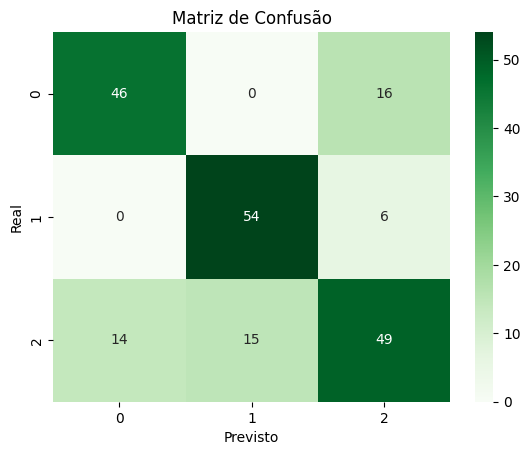

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.77      0.74      0.75        62
         Low       0.78      0.90      0.84        60
      Medium       0.69      0.63      0.66        78

    accuracy                           0.74       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.74      0.74      0.74       200




Avaliando modelo: SVM
Acurácia: 0.79
              precision    recall  f1-score   support

        High       0.86      0.77      0.81        62
         Low       0.81      0.87      0.84        60
      Medium       0.72      0.74      0.73        78

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.80       200
weighted avg       0.79      0.79      0.79       200



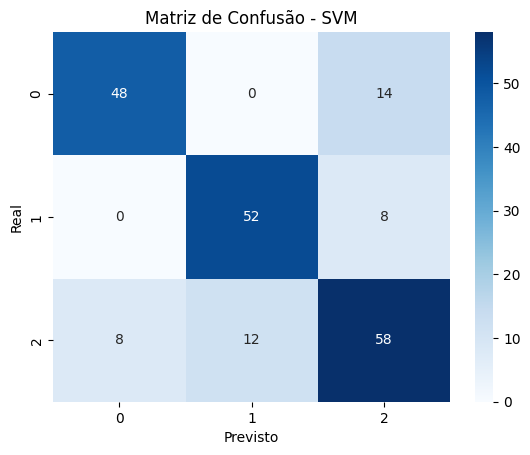


Avaliando modelo: KNN
Acurácia: 0.63
              precision    recall  f1-score   support

        High       0.68      0.73      0.70        62
         Low       0.66      0.72      0.69        60
      Medium       0.55      0.49      0.52        78

    accuracy                           0.63       200
   macro avg       0.63      0.64      0.64       200
weighted avg       0.62      0.63      0.63       200



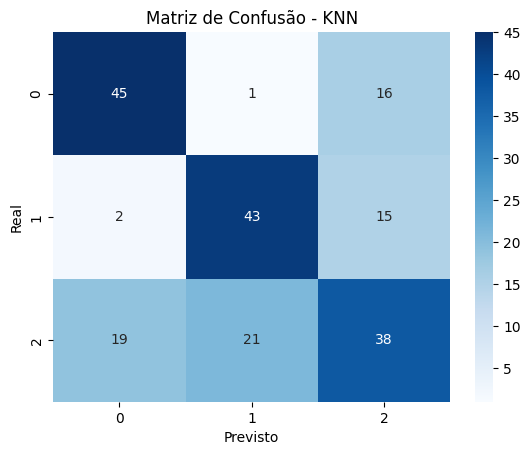

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definindo o transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 2. Lista de modelos a comparar
modelos = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# 3. Comparar os modelos
for nome, modelo in modelos.items():
    print(f"\nAvaliando modelo: {nome}")
    
    pipeline = Pipeline(steps=[
        ('preprocessamento', preprocessor),
        ('classificador', modelo)
    ])

    # Treinamento
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Métricas
    print("Acurácia:", pipeline.score(X_test, y_test))
    print(classification_report(y_test, y_pred))

    # Matriz de confusão
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Pré-processador
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Modelos que você quer testar
modelos = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Apenas imprimir acurácias
for nome, modelo in modelos.items():
    pipeline = Pipeline([
        ("preprocessamento", preprocessor),
        ("classificador", modelo)
    ])
    pipeline.fit(X_train, y_train)
    acc = pipeline.score(X_test, y_test)
    print(f"Acurácia do {nome}: {acc:.2f}")

Acurácia do SVM: 0.79
Acurácia do KNN: 0.63
